In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_excel('Project 3\Bird Strikes data.xlsx')

#importing the data

In [3]:
# understanding the data

data.shape

(25558, 26)

In [4]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25558 entries, 0 to 25557
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Record ID                                25558 non-null  int64         
 1   Aircraft: Type                           25429 non-null  object        
 2   Airport: Name                            25429 non-null  object        
 3   Altitude bin                             25429 non-null  object        
 4   Aircraft: Make/Model                     25558 non-null  object        
 5   Wildlife: Number struck                  25429 non-null  object        
 6   Wildlife: Number Struck Actual           25558 non-null  int64         
 7   Effect: Impact to flight                 25429 non-null  object        
 8   FlightDate                               25429 non-null  datetime64[ns]
 9   Effect: Indicated Damage               

In [5]:
data.describe()

# wildlife number struck actual seems to have ouliers, feet above ground seems to have outliers. 

,Record ID,Wildlife: Number Struck Actual,Cost: Total $,Feet above ground,Number of people injured
count,25558.000000,25558.000000,2.555800e+04,25429.000000,25558.000000
mean,253916.085609,2.691525,5.567354e+03,799.028432,0.001056
std,38510.453382,12.793975,1.219713e+05,1740.079843,0.050420
min,1195.000000,1.000000,0.000000e+00,0.000000,0.000000
25%,225783.750000,1.000000,0.000000e+00,0.000000,0.000000
50%,248749.000000,1.000000,0.000000e+00,50.000000,0.000000
75%,269168.750000,1.000000,0.000000e+00,700.000000,0.000000
max,321909.000000,942.000000,1.239775e+07,18000.000000,6.000000


# Step 1: Data preprocessing

In [6]:
data.nunique()
#no duplicate values or records there. 

Record ID                                  25558
Aircraft: Type                                 1
Airport: Name                               1109
Altitude bin                                   2
Aircraft: Make/Model                         351
Wildlife: Number struck                        4
Wildlife: Number Struck Actual               106
Effect: Impact to flight                       5
FlightDate                                  4225
Effect: Indicated Damage                       2
Aircraft: Number of engines?                   5
Aircraft: Airline/Operator                   292
Origin State                                  60
When: Phase of flight                          7
Conditions: Precipitation                      8
Remains of wildlife collected?                 2
Remains of wildlife sent to Smithsonian        2
Remarks                                    18186
Wildlife: Size                                 3
Conditions: Sky                                3
Wildlife: Species   

### Dealing with missing values. 

In [7]:
data.isna().any().sum()
# yes there are null values....15 columns have null values.  

15

In [8]:
data.isna().sum().sort_values(ascending= False)
#Has null values, which needs to be dealt with.  

Remarks                                    4771
Origin State                                449
Aircraft: Number of engines?                267
When: Phase of flight                       129
Feet above ground                           129
Pilot warned of birds or wildlife?          129
Wildlife: Size                              129
Aircraft: Type                              129
Aircraft: Airline/Operator                  129
Is Aircraft Large?                          129
FlightDate                                  129
Effect: Impact to flight                    129
Wildlife: Number struck                     129
Altitude bin                                129
Airport: Name                               129
Effect: Indicated Damage                      0
Wildlife: Number Struck Actual                0
Conditions: Precipitation                     0
Remains of wildlife collected?                0
Remains of wildlife sent to Smithsonian       0
Aircraft: Make/Model                    

In [9]:
data.isnull().sum().sort_values(ascending=False)

Remarks                                    4771
Origin State                                449
Aircraft: Number of engines?                267
When: Phase of flight                       129
Feet above ground                           129
Pilot warned of birds or wildlife?          129
Wildlife: Size                              129
Aircraft: Type                              129
Aircraft: Airline/Operator                  129
Is Aircraft Large?                          129
FlightDate                                  129
Effect: Impact to flight                    129
Wildlife: Number struck                     129
Altitude bin                                129
Airport: Name                               129
Effect: Indicated Damage                      0
Wildlife: Number Struck Actual                0
Conditions: Precipitation                     0
Remains of wildlife collected?                0
Remains of wildlife sent to Smithsonian       0
Aircraft: Make/Model                    

In [10]:
x= data.isnull().sum()
y= round((data.isnull().sum()/data.shape[0]*100),2)
z= {'Number of missing values': x, '% of missing values': y}
df= pd.DataFrame(z, columns= ['Number of missing values', '% of missing values']).sort_values(by= '% of missing values', ascending=False)
print(df)

#remarks column has the highest % of missing values, followed by origin state, Aircraft number of engines, & phase of flight.
# other parameters we can either remove it or imput it based on the feature as it has extremely low missing values, 

                                         Number of missing values  \
Remarks                                                      4771   
Origin State                                                  449   
Aircraft: Number of engines?                                  267   
When: Phase of flight                                         129   
Feet above ground                                             129   
Pilot warned of birds or wildlife?                            129   
Wildlife: Size                                                129   
Aircraft: Type                                                129   
Aircraft: Airline/Operator                                    129   
Is Aircraft Large?                                            129   
FlightDate                                                    129   
Effect: Impact to flight                                      129   
Wildlife: Number struck                                       129   
Altitude bin                      

In [11]:
data.columns

Index(['Record ID', 'Aircraft: Type', 'Airport: Name', 'Altitude bin',
       'Aircraft: Make/Model', 'Wildlife: Number struck',
       'Wildlife: Number Struck Actual', 'Effect: Impact to flight',
       'FlightDate', 'Effect: Indicated Damage',
       'Aircraft: Number of engines?', 'Aircraft: Airline/Operator',
       'Origin State', 'When: Phase of flight', 'Conditions: Precipitation',
       'Remains of wildlife collected?',
       'Remains of wildlife sent to Smithsonian', 'Remarks', 'Wildlife: Size',
       'Conditions: Sky', 'Wildlife: Species',
       'Pilot warned of birds or wildlife?', 'Cost: Total $',
       'Feet above ground', 'Number of people injured', 'Is Aircraft Large?'],
      dtype='object')

In [12]:
data.nunique()

Record ID                                  25558
Aircraft: Type                                 1
Airport: Name                               1109
Altitude bin                                   2
Aircraft: Make/Model                         351
Wildlife: Number struck                        4
Wildlife: Number Struck Actual               106
Effect: Impact to flight                       5
FlightDate                                  4225
Effect: Indicated Damage                       2
Aircraft: Number of engines?                   5
Aircraft: Airline/Operator                   292
Origin State                                  60
When: Phase of flight                          7
Conditions: Precipitation                      8
Remains of wildlife collected?                 2
Remains of wildlife sent to Smithsonian        2
Remarks                                    18186
Wildlife: Size                                 3
Conditions: Sky                                3
Wildlife: Species   

In [13]:
data.drop(columns=['Aircraft: Type'], inplace=True)

# aircraft has only one value, so dropped it.

In [14]:
data.shape

(25558, 25)

In [15]:
# Dealing with the missing values.
# we would drop the values for which there are 0.5% of missing values as it wont affect our analysis. 

data.dropna(subset= ['Airport: Name', 'Altitude bin', 'Wildlife: Number struck','When: Phase of flight', 'Feet above ground','Pilot warned of birds or wildlife?', 'Wildlife: Size','Aircraft: Airline/Operator','Is Aircraft Large?', 'FlightDate','Effect: Impact to flight'], axis=0, inplace=True)

In [16]:
data.shape

(25429, 25)

In [17]:
df.iloc[:3]

,Number of missing values,% of missing values
Remarks,4771,18.67
Origin State,449,1.76
Aircraft: Number of engines?,267,1.04


In [18]:
data['Aircraft: Number of engines?']=data['Aircraft: Number of engines?'].fillna(data['Aircraft: Number of engines?'].mode()[0])

In [19]:
data['Aircraft: Number of engines?'].nunique()

5

In [20]:
data['Origin State']=data['Origin State'].fillna(data['Origin State'].mode()[0])

In [21]:
data['Origin State'].nunique()

60

In [22]:
data.drop(columns= ['Remarks'], axis= 1, inplace=True)

In [23]:
data.isnull().sum().sort_values()

#remarks have only missing values, with 18.25%, rest all missing values have been dealth with. 

Record ID                                  0
Feet above ground                          0
Cost: Total $                              0
Pilot warned of birds or wildlife?         0
Wildlife: Species                          0
Conditions: Sky                            0
Wildlife: Size                             0
Remains of wildlife sent to Smithsonian    0
Remains of wildlife collected?             0
Conditions: Precipitation                  0
When: Phase of flight                      0
Origin State                               0
Aircraft: Airline/Operator                 0
Aircraft: Number of engines?               0
Effect: Indicated Damage                   0
FlightDate                                 0
Effect: Impact to flight                   0
Wildlife: Number Struck Actual             0
Wildlife: Number struck                    0
Aircraft: Make/Model                       0
Altitude bin                               0
Airport: Name                              0
Number of 

In [24]:
data.isnull().values.sum()

0

In [25]:
data.shape
#missing data are dealt with..now we would be doing preprocessing for other details. 

(25429, 24)

In [26]:
data.columns

Index(['Record ID', 'Airport: Name', 'Altitude bin', 'Aircraft: Make/Model',
       'Wildlife: Number struck', 'Wildlife: Number Struck Actual',
       'Effect: Impact to flight', 'FlightDate', 'Effect: Indicated Damage',
       'Aircraft: Number of engines?', 'Aircraft: Airline/Operator',
       'Origin State', 'When: Phase of flight', 'Conditions: Precipitation',
       'Remains of wildlife collected?',
       'Remains of wildlife sent to Smithsonian', 'Wildlife: Size',
       'Conditions: Sky', 'Wildlife: Species',
       'Pilot warned of birds or wildlife?', 'Cost: Total $',
       'Feet above ground', 'Number of people injured', 'Is Aircraft Large?'],
      dtype='object')

In [27]:
data.select_dtypes(include='object').columns

Index(['Airport: Name', 'Altitude bin', 'Aircraft: Make/Model',
       'Wildlife: Number struck', 'Effect: Impact to flight',
       'Effect: Indicated Damage', 'Aircraft: Number of engines?',
       'Aircraft: Airline/Operator', 'Origin State', 'When: Phase of flight',
       'Conditions: Precipitation', 'Wildlife: Size', 'Conditions: Sky',
       'Wildlife: Species', 'Pilot warned of birds or wildlife?',
       'Is Aircraft Large?'],
      dtype='object')

In [28]:
data.select_dtypes(exclude='object').columns

Index(['Record ID', 'Wildlife: Number Struck Actual', 'FlightDate',
       'Remains of wildlife collected?',
       'Remains of wildlife sent to Smithsonian', 'Cost: Total $',
       'Feet above ground', 'Number of people injured'],
      dtype='object')

In [29]:
data['Conditions: Precipitation'].value_counts()

# need to replace the none data as it was not captured by pandas as these were not NA values.

None               23414
Rain                1353
Fog                  475
Snow                  89
Fog, Rain             85
Rain, Snow             6
Fog, Snow              4
Fog, Rain, Snow        3
Name: Conditions: Precipitation, dtype: int64

In [30]:
(data[data['Conditions: Precipitation']=="None"].shape[0]/ data.shape[0])*100

#as 92.07% of data is none, so it would not be correct to impute it with mode and it would be of no use to our data. 
#will not use this parameter to perform data analysis. 

92.07597624759133

In [31]:
(data[data['Conditions: Sky']=="None"].shape[0]/ data.shape[0])*100

0.0

In [32]:
# EDA 
# Data Visualization & Data analysis

In [33]:
### Need to understand what are the factors that are affecting the bird strike,- is it one of the below parameters???
### alitude/ feet above the ground---yes imp factor <1000 ft more chances 
### sky weather condition-----yes, no cloud conditions
### pilots informed or not- prior warning---no prior warning means more chances
### time/ phase of the flight----yes imp. phases of flight where it is <1000 ft and in movement
### wildlife size---doesnt impact----but they are flying more in <1000ft altitude. 
### number of engines-------doesnt impact the bird strike
### aircraft size.---doesnt impact. 

In [34]:
#univariate analysis- searching outliers -boxplot, 
#bivariate analysis-

In [35]:
# #bivariate analysis-

# damage and aircraft size-----------------------small aircrafts have more damages. 
# wildlife sruck vs damage impact-------------more is the widlife struck more is the damage
# Were Pilots Informed? & Prior Warning and Effect of Strike Relation-------when not informed, more is the cases of strike.
# damage impact vs flight impact----for most of the time damage impact--- engine shutdown and precautionary landing.
#total cost inccured vs number & size of wildlife------------- larger the wildlife, more is the cost incurred.
# airline operator vs wildlife strike/ Top 10 US Airlines in terms of having encountered bird strikes--found the airlines
# Airports with most number of bird strikes – Top 50----found the airports.
# No of wildlife aircraft vs cost total------more is the no. of wildlife struck more is the cost
# is there any relation between altitude bin and the bird strik-------<1000ft more strikes are there.  
# Yearly Analysis & Bird Strikes-- which year maximum strikes----year 2010 has maximum strikes. 
# sky condition and altitude or feet above the ground------<1000ft overcast condition was prevalant. 
# origin state vs wildlife struck actual number---highest in california. 
# Effect of Bird Strikes & Impact on Flight-----#majority of times no effect. 
# total Cost Incurred due to Bird Strikes:----higher the strike number, higher is the cost. 
# yearly cost---decreased over years due to decrease inover 100 strike, so less damage, so cost also lessend. 
# When do most bird strikes occur?--Phase of flight at the time of the strike.---during aproach highest bird strike.
# Average Altitude of the aeroplanes in different phases at the time of strike -----done. 
# which airline has the most number of bird strkes---business has most numberof strike.
# Effect of Strike at Different Altitude----indicated damage and strike-----70% of flights damaged flying <1000ft.
# impact to flight and number of engines------not related with number of engines.
# size of the airplane and the bird strike. ----smaller planes have high strie rate as compared to larger ones. 
# airplane size and altitude bin.-------small planes are flying majorly in <1000ft and more larger planes in >1000ft.
# effect on airplane and wildlife size--------large and medium size are creating more damage. 
# wildlife size and feet above the ground.-------#all sizes birds are flying more in <1000ft altitude.
# wildlife size and number of birds struck--small birds are struck the highest. 
# impact to flight and the cost endured.--engine shut down has the max cost incurred. 
# weather condition vs wildlife struck---------in no cloud conditions, mostof the bird strikes happend.

In [36]:
data.columns

Index(['Record ID', 'Airport: Name', 'Altitude bin', 'Aircraft: Make/Model',
       'Wildlife: Number struck', 'Wildlife: Number Struck Actual',
       'Effect: Impact to flight', 'FlightDate', 'Effect: Indicated Damage',
       'Aircraft: Number of engines?', 'Aircraft: Airline/Operator',
       'Origin State', 'When: Phase of flight', 'Conditions: Precipitation',
       'Remains of wildlife collected?',
       'Remains of wildlife sent to Smithsonian', 'Wildlife: Size',
       'Conditions: Sky', 'Wildlife: Species',
       'Pilot warned of birds or wildlife?', 'Cost: Total $',
       'Feet above ground', 'Number of people injured', 'Is Aircraft Large?'],
      dtype='object')

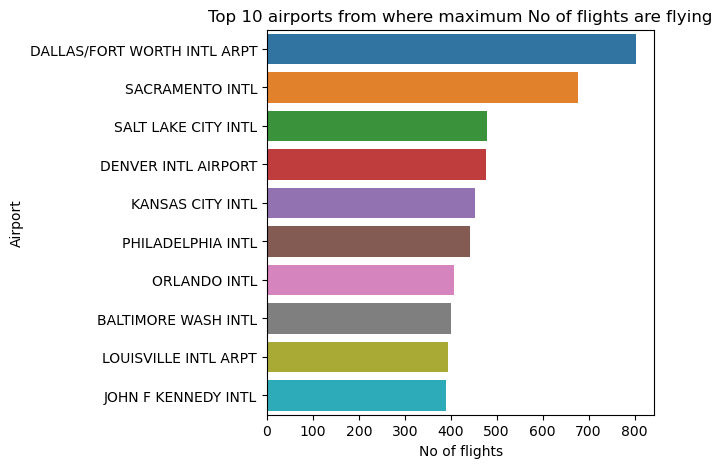

In [37]:
#majority of flights are flying from which airport/ origin city
plt.figure(figsize=(5,5))
sns.countplot(y= data['Airport: Name'], order= data['Airport: Name'].value_counts().iloc[:10].index)
plt.title("Top 10 airports from where maximum No of flights are flying")
plt.xlabel("No of flights")
plt.ylabel("Airport")
plt.show()

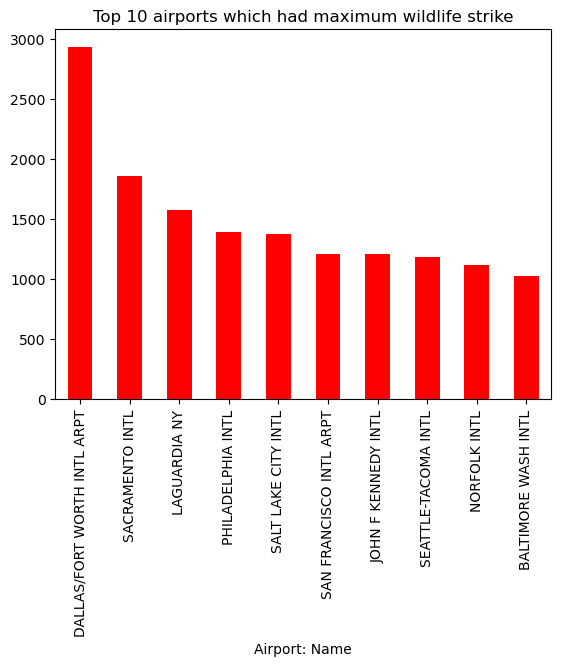

<Figure size 1000x1000 with 0 Axes>

In [38]:
# Airports with most number of bird strikes – Top 50....
data['Wildlife: Number Struck Actual'].groupby(data['Airport: Name']).agg('sum').sort_values(ascending= False).iloc[:10].plot(kind='bar', color='red')
plt.title("Top 10 airports which had maximum wildlife strike")
plt.figure(figsize=(10,10))
plt.show()

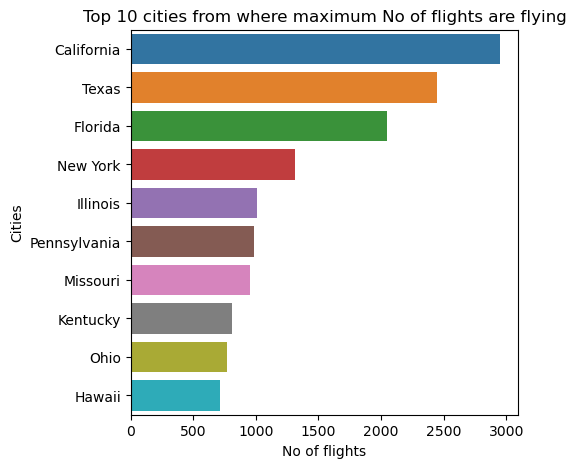

In [39]:
#origin state-----from california maximum flights are going. 
plt.figure(figsize=(5,5))
sns.countplot(y= data['Origin State'], order= data['Origin State'].value_counts().iloc[:10].index)
plt.title("Top 10 cities from where maximum No of flights are flying")
plt.xlabel("No of flights")
plt.ylabel("Cities")
plt.show()

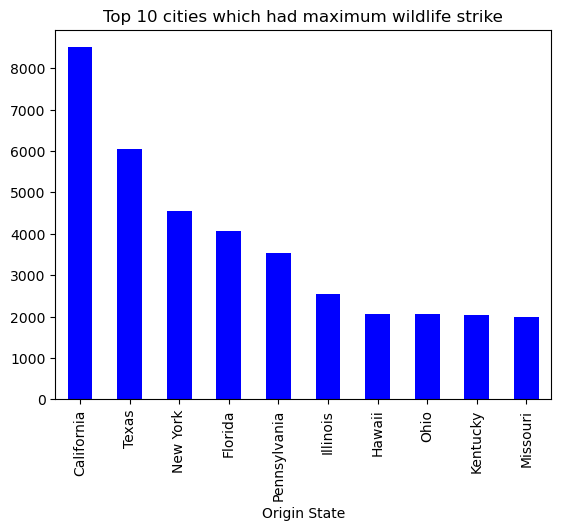

<Figure size 800x500 with 0 Axes>

In [40]:
# airline operator vs wildlife strike/ Top 10 US Airlines in terms of having encountered bird strikes

data['Wildlife: Number Struck Actual'].groupby(data['Origin State']).agg('sum').sort_values(ascending= False).iloc[:10].plot(kind='bar', color='b')
plt.title("Top 10 cities which had maximum wildlife strike")
plt.figure(figsize=(8,5))
plt.show()

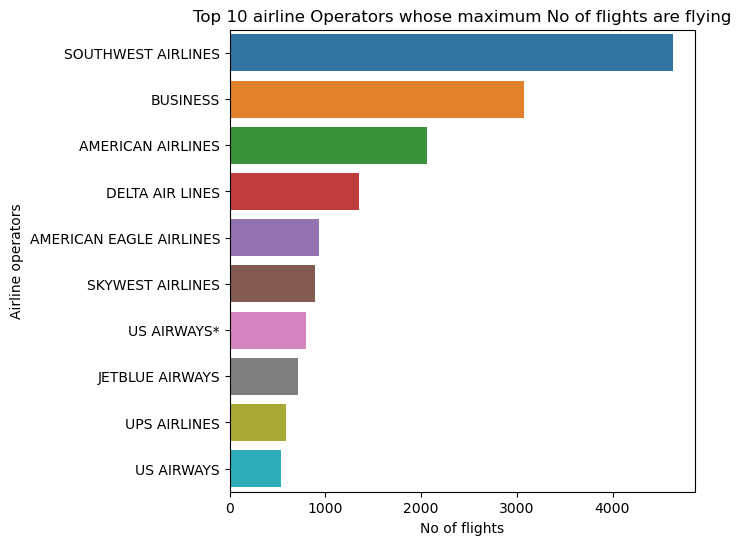

In [41]:
# Southwest airlines are the operators that have maximum flights
plt.figure(figsize=(6,6))
sns.countplot(y= data['Aircraft: Airline/Operator'], order= data['Aircraft: Airline/Operator'].value_counts().iloc[:10].index)
plt.title("Top 10 airline Operators whose maximum No of flights are flying")
plt.xlabel("No of flights")
plt.ylabel("Airline operators")
plt.show()

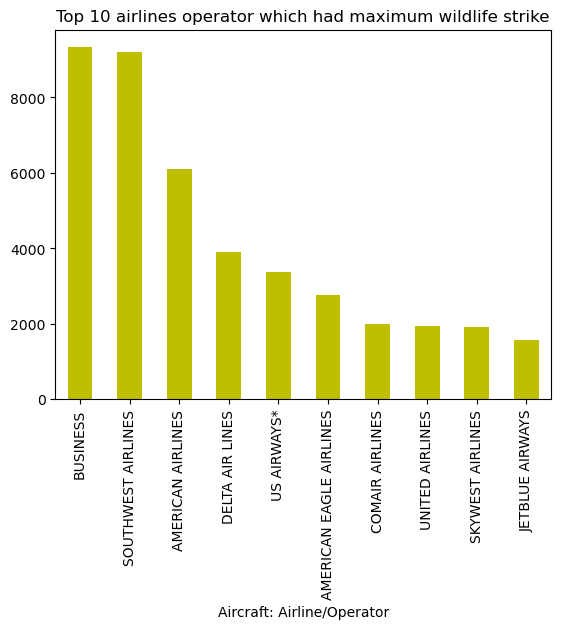

<Figure size 800x500 with 0 Axes>

In [42]:
# airline operator vs wildlife strike/ Top 10 US Airlines in terms of having encountered bird strikes

data['Wildlife: Number Struck Actual'].groupby(data['Aircraft: Airline/Operator']).agg('sum').sort_values(ascending= False).iloc[:10].plot(kind='bar', color='y')
plt.title("Top 10 airlines operator which had maximum wildlife strike")
plt.figure(figsize=(8,5))
plt.show()

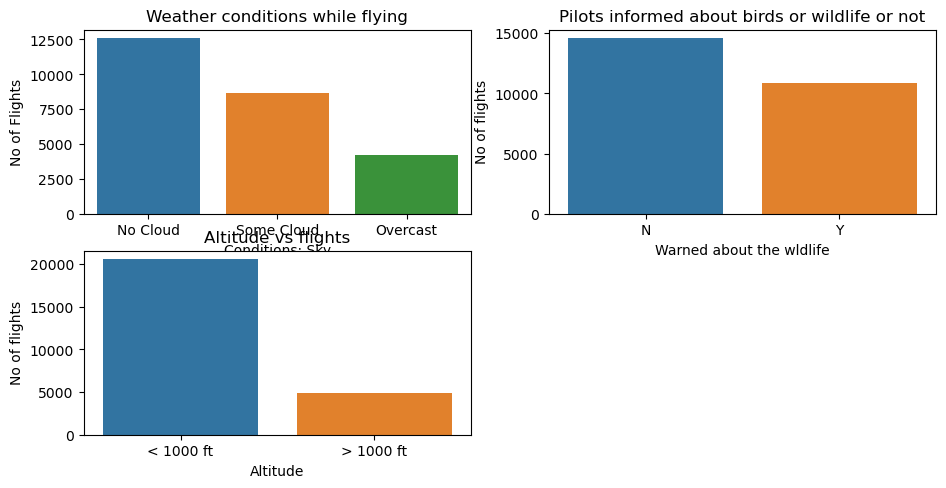

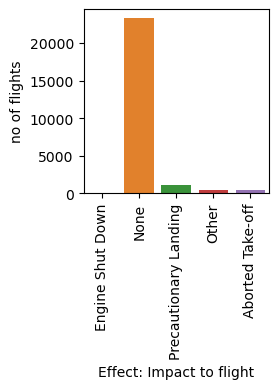

In [43]:
plt.rcParams['figure.figsize']=(11,11)

plt.subplot(4,2,1)
sns.countplot(data['Conditions: Sky'], order= data['Conditions: Sky'].value_counts().index)
plt.title("Weather conditions while flying")
plt.ylabel("No of Flights")


plt.subplot(4,2,2)
sns.countplot(data['Pilot warned of birds or wildlife?'], order= data['Pilot warned of birds or wildlife?'].value_counts().index)
plt.title("Pilots informed about birds or wildlife or not")
plt.xlabel("Warned about the wldlife")
plt.ylabel("No of flights")

plt.subplot(4,2,3)
sns.countplot(data['Altitude bin'], order= data['Altitude bin'].value_counts().index)
plt.title("Altitude vs flights")
plt.xlabel("Altitude")
plt.ylabel("No of flights")
plt.show()

plt.subplot(4,4,4)
sns.countplot(data['Effect: Impact to flight'])
plt.xticks(rotation=90)
plt.ylabel("no of flights")
plt.show()

#Most of the times the pilots were not informed regarding the wildlife

plt.show()

# Majority of flights are flying at a level of less than <1000ft. 
# There were clear weather conditions while flying for majority of flights
# Pilot were not informed about the wlidlife or birds for most of the times. 

In [44]:
# Bivariate Analysis

In [45]:
data.columns

Index(['Record ID', 'Airport: Name', 'Altitude bin', 'Aircraft: Make/Model',
       'Wildlife: Number struck', 'Wildlife: Number Struck Actual',
       'Effect: Impact to flight', 'FlightDate', 'Effect: Indicated Damage',
       'Aircraft: Number of engines?', 'Aircraft: Airline/Operator',
       'Origin State', 'When: Phase of flight', 'Conditions: Precipitation',
       'Remains of wildlife collected?',
       'Remains of wildlife sent to Smithsonian', 'Wildlife: Size',
       'Conditions: Sky', 'Wildlife: Species',
       'Pilot warned of birds or wildlife?', 'Cost: Total $',
       'Feet above ground', 'Number of people injured', 'Is Aircraft Large?'],
      dtype='object')

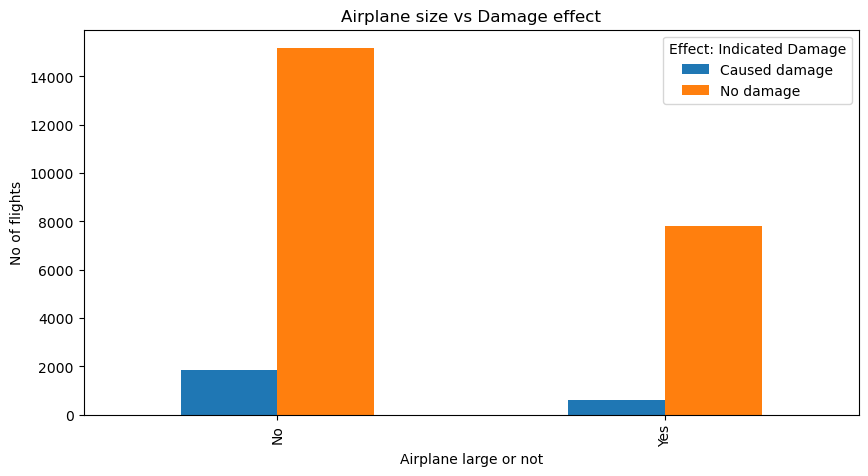

In [46]:
# damage and aircraft size
plt.rcParams['figure.figsize']=(10,5)
data.groupby('Is Aircraft Large?')['Effect: Indicated Damage'].value_counts(normalize=False).unstack().plot(kind='bar', stacked= False)
plt.title("Airplane size vs Damage effect")
plt.xlabel("Airplane large or not")
plt.ylabel("No of flights")
plt.show()

#small airplanes have more damages as compared to the large airplanes. 

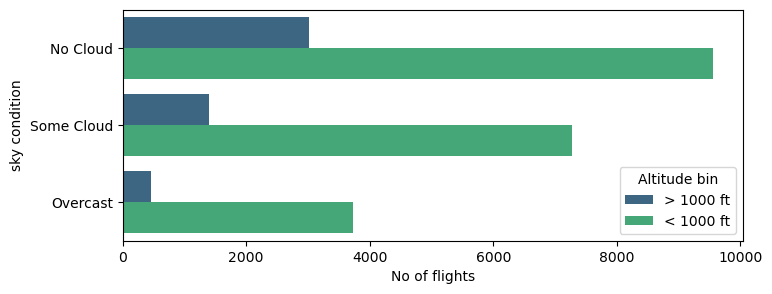

In [47]:
# weather condition vs wildlife struck

plt.rcParams['figure.figsize']=(8,3)
sns.countplot(y= 'Conditions: Sky', data=data, hue='Altitude bin', palette= 'viridis')
plt.xlabel("No of flights")
plt.ylabel("sky condition")
plt.show()
# 'Wildlife: Number struck'

In [48]:
data.groupby('Conditions: Sky')['Wildlife: Number Struck Actual'].agg('sum').sort_values(ascending=False)
#in no cloud situation, more birds were hit by the planes. 

Conditions: Sky
No Cloud      32542
Some Cloud    22427
Overcast      13680
Name: Wildlife: Number Struck Actual, dtype: int64

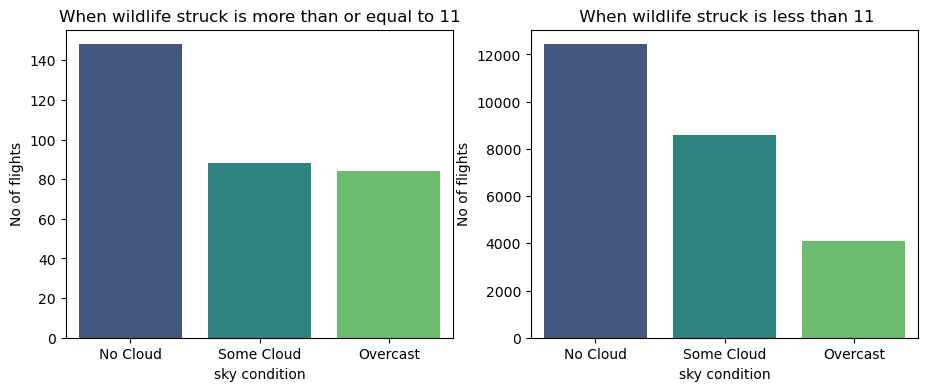

In [49]:
plt.rcParams['figure.figsize']=(11,4)
plt.subplot(1,2,1)
sns.countplot(x= 'Conditions: Sky', data=data[(data['Wildlife: Number Struck Actual']>=11)], palette= 'viridis')
plt.title("When wildlife struck is more than or equal to 11")
plt.xlabel("sky condition")
plt.ylabel("No of flights")

plt.subplot(1,2,2)
sns.countplot(x= 'Conditions: Sky', data=data[(data['Wildlife: Number Struck Actual']<11)], order= data['Conditions: Sky'].value_counts().index, palette= 'viridis')
plt.title(" When wildlife struck is less than 11")
plt.xlabel("sky condition")
plt.ylabel("No of flights")
plt.show()
 

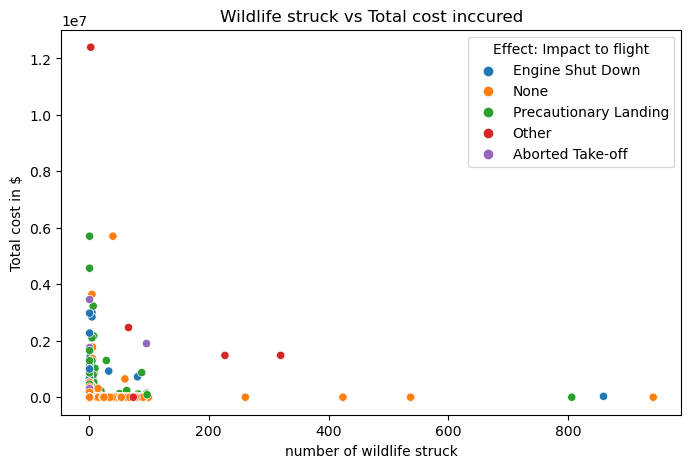

In [50]:
plt.figure(figsize=(8,5))
sns.scatterplot(y= 'Cost: Total $', x='Wildlife: Number Struck Actual', data= data, hue='Effect: Impact to flight')
plt.title("Wildlife struck vs Total cost inccured")
plt.ylabel("Total cost in $")
plt.xlabel("number of wildlife struck")
plt.show()

# 'Wildlife: Size'
# we can see that for majoirty of cases 1 wildlife are struck per flight, 
# most of the cases, cost is increasing if the wildlife size is large, 
# for small wildlife, though number is higher, cost incurred by the operators are lower. 

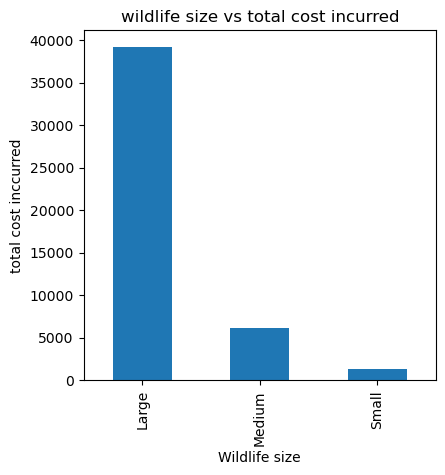

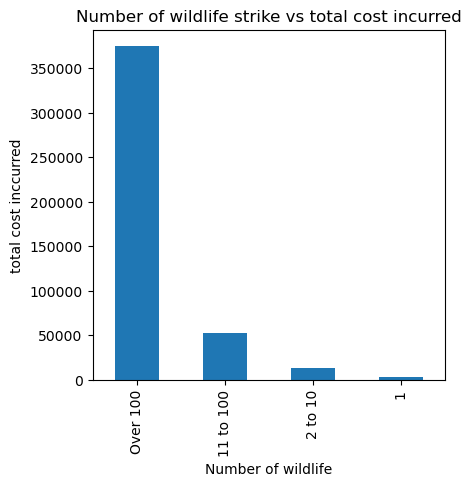

In [51]:
# wildlife size, number and the cost endured.
plt.rcParams['figure.figsize']=(10,10)

plt.subplot(2,2,1)
data.groupby('Wildlife: Size')['Cost: Total $'].agg('mean').sort_values(ascending=False).plot(kind='bar')
plt.title("wildlife size vs total cost incurred")
plt.xlabel('Wildlife size')
plt.ylabel("total cost inccurred")
plt.show()

plt.subplot(2,2,2)
data.groupby('Wildlife: Number struck')['Cost: Total $'].agg('mean').sort_values(ascending=False).plot(kind='bar')
plt.title("Number of wildlife strike vs total cost incurred")
plt.xlabel('Number of wildlife')
plt.ylabel("total cost inccurred")
plt.show()

#Cost inccured is high when the wildlife are large in size and lowest for small wildlife.
# it shows that higher the number of wildlife struck, higher is the cost incurred. 

## wildlife sruck vs damage impact
## Result: # flights which have struck over 100 birds/wildlife are the most damaged.

In [52]:
(data[data['Effect: Indicated Damage']=='Caused damage']).groupby(data['Wildlife: Number struck']).agg('count')[['Effect: Indicated Damage']]

,Effect: Indicated Damage
Wildlife: Number struck,
1,1789
11 to 100,77
2 to 10,584
Over 100,4


In [53]:
#converting it into a dataframe-
df= pd.DataFrame({'1': [1789], '11 to 100':[77], '2 to 10':[584], 'Over 100':[4]})
new_df= pd.DataFrame(df, columns=df.columns).apply(lambda x: int(x))

In [54]:
y= (data['Record ID'].groupby(data['Wildlife: Number struck']).agg('count')).apply(lambda x:int(x))
print(y)

Wildlife: Number struck
1            20790
11 to 100      312
2 to 10       4319
Over 100         8
Name: Record ID, dtype: int64


In [55]:
z=(list(map(lambda a,b:(a/b)*100, new_df,y)))
print(z)
#More the number of wildlife are struck more is the damage. 
# about 50% of the flight which had struck more than 100 wildlifes are most damaged. 
#then next is 11 to 100 followed by 2 to 10 and least by 1
# suggesting that huge bird strike are affecting the airplane or damaging the airplane. 

[8.605098605098604, 24.679487179487182, 13.521648529752259, 50.0]


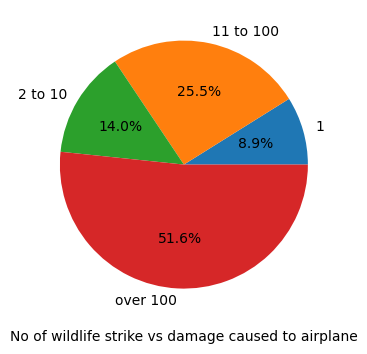

In [56]:
plt.figure(figsize=(4, 5))

z=[8.605098605098604, 24.679487179487182, 13.521648529752259, 50.0]
plt.pie(z, labels=['1', '11 to 100', '2 to 10', 'over 100'], autopct='%1.1f%%')
plt.xlabel('No of wildlife strike vs damage caused to airplane')
plt.show()


# flights which have struck over 100 birds/wildlife are the most damaged. 

In [57]:
#pilot were warned or not vs wildlife struck
#so, when pilots were not informed for all of the cases half of the time it led to a bird strike
#implying they should be informed to reduce all the strike to a large extent.

pd.crosstab(data['Pilot warned of birds or wildlife?'],data['Wildlife: Number struck'])

Wildlife: Number struck,1,11 to 100,2 to 10,Over 100
Pilot warned of birds or wildlife?,,,,
N,12219,150,2193,5
Y,8571,162,2126,3


In [58]:
data[data['Pilot warned of birds or wildlife?']=='N'].groupby(data['Wildlife: Number struck']).agg('count')[['Pilot warned of birds or wildlife?']]

,Pilot warned of birds or wildlife?
Wildlife: Number struck,
1,12219
11 to 100,150
2 to 10,2193
Over 100,5


In [59]:
#converting it into dataframe
df= pd.DataFrame({'1': [12219], '11 to 100':[150], '2 to 10': [2193], 'over 100': [5]})
new_df=pd.DataFrame(df, columns=df.columns).apply(lambda x: int(x))
print(new_df)

1            12219
11 to 100      150
2 to 10       2193
over 100         5
dtype: int64


In [60]:
y= (data['Record ID'].groupby(data['Wildlife: Number struck']).agg('count')).apply(lambda x:int(x))
print(y)

Wildlife: Number struck
1            20790
11 to 100      312
2 to 10       4319
Over 100         8
Name: Record ID, dtype: int64


In [61]:
z=(list(map(lambda a,b:(a/b)*100, new_df,y)))
print(z)
#we can see that when the pilots are not informed about the wildife, more than half of the time there is a strike.

[58.77344877344878, 48.07692307692308, 50.77564250984024, 62.5]


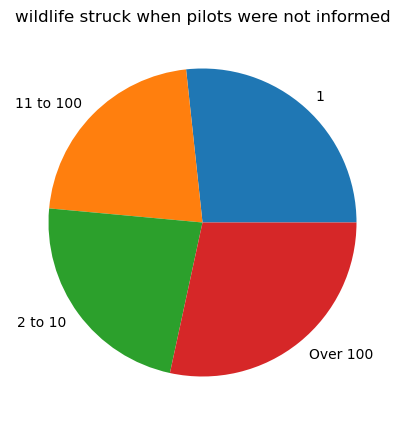

In [138]:
z=[58.77344877344878, 48.07692307692308, 50.77564250984024, 62.5]
plt.figure(figsize=(5,5))
plt.pie(z, labels= ['1', '11 to 100', '2 to 10','Over 100'])
plt.title("wildlife struck when pilots were not informed")
plt.show()
#so, when pilots were not informed for all of the cases half of the time it led to a bird strike
#implying they should be informed to reduce all the strike to a large extent.

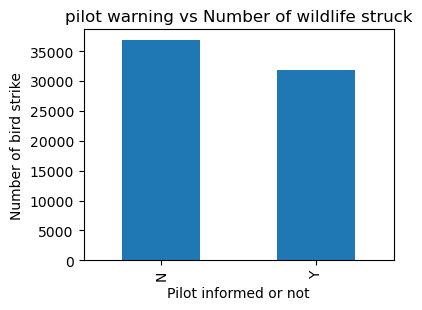

In [63]:
#pilot warned about the flight s wildlife struck

plt.figure(figsize=(4,3))
data.groupby('Pilot warned of birds or wildlife?')['Wildlife: Number Struck Actual'].agg('sum').sort_values(ascending=False).plot(kind='bar')
plt.title("pilot warning vs Number of wildlife struck")
plt.xlabel('Pilot informed or not')
plt.ylabel("Number of bird strike")
plt.show()

In [64]:
'Effect: Impact to flight', 'FlightDate', 'Effect: Indicated Damage'

('Effect: Impact to flight', 'FlightDate', 'Effect: Indicated Damage')

In [65]:
# damage impact vs flight impact
#result: #majority of the time, engine shuts down due to the bird strike follows byprecuatonary landing
data[data['Effect: Indicated Damage']=='Caused damage'].groupby(data['Effect: Impact to flight']).agg('count')[['Effect: Indicated Damage']]

,Effect: Indicated Damage
Effect: Impact to flight,
Aborted Take-off,128
Engine Shut Down,78
None,1543
Other,163
Precautionary Landing,542


In [66]:
#converting it into dataframe
df= pd.DataFrame({'Aborted Take-off': [128], 'Engine Shut Down':[78], 'None': [1543], 'Other': [163], 'Precautionary Landing': [542]})
new_df=pd.DataFrame(df, columns=df.columns).apply(lambda x: int(x))
print(new_df)

Aborted Take-off          128
Engine Shut Down           78
None                     1543
Other                     163
Precautionary Landing     542
dtype: int64


In [67]:
y= (data['Record ID'].groupby(data['Effect: Impact to flight']).agg('count')).apply(lambda x:int(x))
print(y)

Effect: Impact to flight
Aborted Take-off           479
Engine Shut Down            88
None                     23351
Other                      390
Precautionary Landing     1121
Name: Record ID, dtype: int64


In [68]:
z=(list(map(lambda a,b:(a/b)*100, new_df,y)))
print(z)
#we can see that when the pilots are not informed about the wildife, more than half of the time there is a strike.

[26.722338204592898, 88.63636363636364, 6.607854053359599, 41.794871794871796, 48.34968777876896]


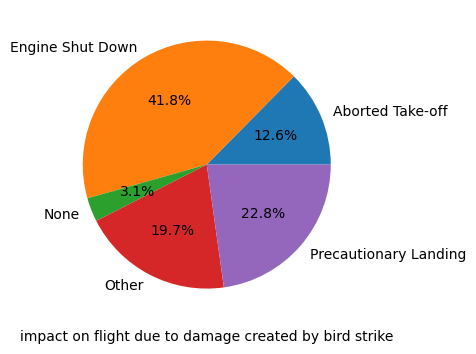

In [69]:
plt.figure(figsize=(4, 5))

z=[26.722338204592898, 88.63636363636364, 6.607854053359599, 41.794871794871796, 48.34968777876896]
plt.pie(z, labels=['Aborted Take-off', 'Engine Shut Down', 'None', 'Other','Precautionary Landing'], autopct='%1.1f%%')
plt.xlabel('impact on flight due to damage created by bird strike')
plt.show()

#majority of the time, engine shuts down due to the bird strike follows byprecuationary landing provided there's been damage to the airplane. 

In [70]:
# damage impact vs flight impact
#result: #majority of the time, engine shuts down due to the bird strike follows byprecuatonary landing
data[data['Effect: Indicated Damage']=='No damage'].groupby(data['Effect: Impact to flight']).agg('count')[['Effect: Indicated Damage']]

,Effect: Indicated Damage
Effect: Impact to flight,
Aborted Take-off,351
Engine Shut Down,10
None,21808
Other,227
Precautionary Landing,579


In [72]:
data.columns

Index(['Record ID', 'Airport: Name', 'Altitude bin', 'Aircraft: Make/Model',
       'Wildlife: Number struck', 'Wildlife: Number Struck Actual',
       'Effect: Impact to flight', 'FlightDate', 'Effect: Indicated Damage',
       'Aircraft: Number of engines?', 'Aircraft: Airline/Operator',
       'Origin State', 'When: Phase of flight', 'Conditions: Precipitation',
       'Remains of wildlife collected?',
       'Remains of wildlife sent to Smithsonian', 'Wildlife: Size',
       'Conditions: Sky', 'Wildlife: Species',
       'Pilot warned of birds or wildlife?', 'Cost: Total $',
       'Feet above ground', 'Number of people injured', 'Is Aircraft Large?'],
      dtype='object')

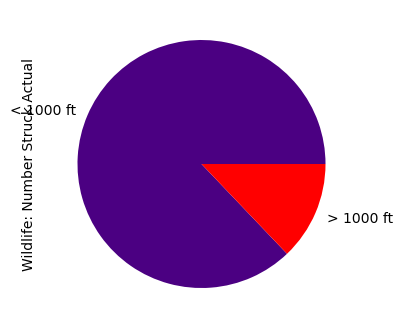

In [73]:
# is there any relation between altitude bin and the bird strike- Altitude of aeroplanes at the time of strike.

plt.figure(figsize=(4,5))
data.groupby("Altitude bin")['Wildlife: Number Struck Actual'].agg('sum').plot(kind='pie', colors=['indigo','red'])
plt.show()

#when the flights are flying in a altitude less than 1000 ft they are strking huge nuber of wildlife 
# as compared to the flights flying >1000ft
#so the flights should be flying 1000 ft and more whenever possible. 

In [74]:
# Yearly Analysis & Bird Strikes-- which year maximum strikes. 

data['Year']= pd.DatetimeIndex(data['FlightDate']).year

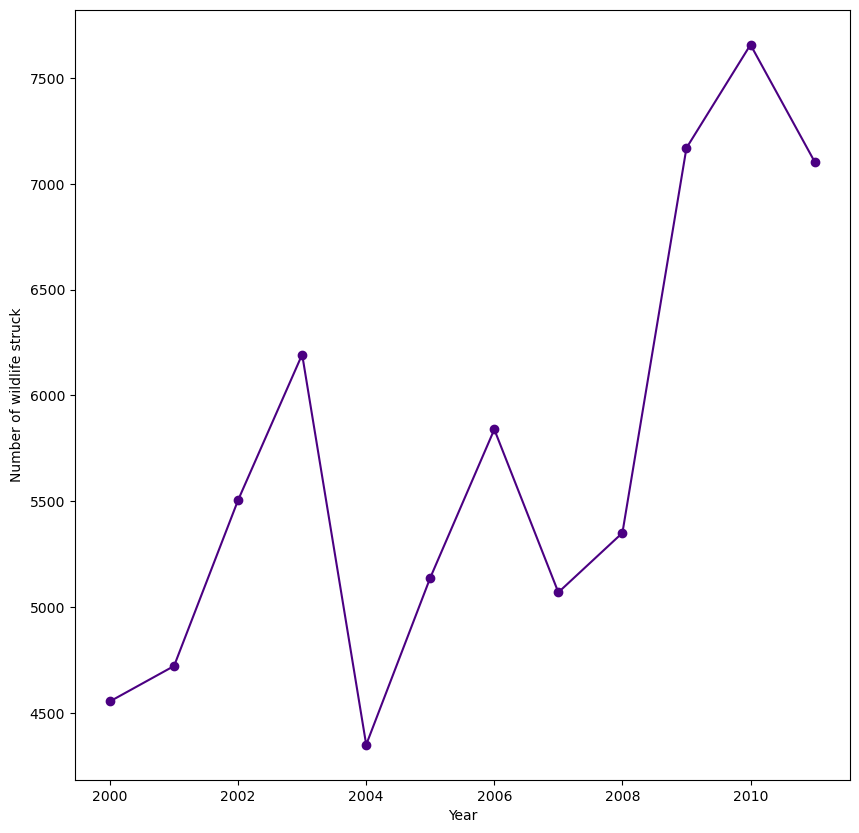

In [75]:
data['Wildlife: Number Struck Actual'].groupby(data['Year']).agg('sum').plot(marker='o', color='indigo')
plt.ylabel("Number of wildlife struck")
plt.show()
#year 2010 had the highest number of wildlife strike. and lowest in 2004. 

In [76]:
# sky condition and altitude or feet above the ground.

# result- for <1000ft, weather condition was overcast for majority of time whe there was birstrike, 
#thus, huge number of birdstrike. 

In [77]:
pd.crosstab(data['Altitude bin'], data['Conditions: Sky'])

Conditions: Sky,No Cloud,Overcast,Some Cloud
Altitude bin,,,
< 1000 ft,9557,3732,7267
> 1000 ft,3018,463,1392


In [78]:
# for <1000 ft cases. 

In [79]:
(data[data['Altitude bin']== '< 1000 ft']).groupby(data['Conditions: Sky']).agg('count')['Conditions: Sky']

Conditions: Sky
No Cloud      9557
Overcast      3732
Some Cloud    7267
Name: Conditions: Sky, dtype: int64

In [80]:
df=pd.DataFrame({'No cloud': [9557], 'Overcast':[3732], 'some cloud':[7267]})
new_df=pd.DataFrame(df, columns=df.columns).apply(lambda x:int(x))
print(new_df)

No cloud      9557
Overcast      3732
some cloud    7267
dtype: int64


In [81]:
y= (data[data['Altitude bin']== '< 1000 ft'].shape[0])
print(y)

20556


In [82]:
z=(list(map(lambda a:(a/y), new_df)))
print(z) 

[0.4649250827009146, 0.18155283129013428, 0.35352208600895113]


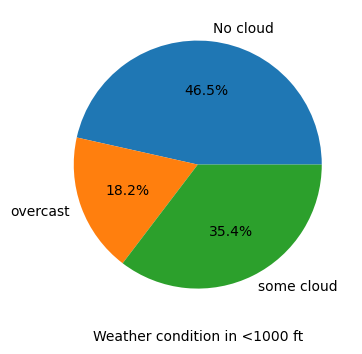

In [83]:
plt.figure(figsize=(4, 5))

z=[0.4649250827009146, 0.18155283129013428, 0.35352208600895113]
plt.pie(z, labels=['No cloud', 'overcast', 'some cloud'], autopct='%1.1f%%')
plt.xlabel('Weather condition in <1000 ft')
plt.show() 


# in <1000ft, 46.5% of planes aired in no cloud condition, 35.4% in some cloud and 18.2% o flights travelled in overcast stiutation

In [84]:
#for >1000 ft cases

In [85]:
(data[data['Altitude bin']== '> 1000 ft']).groupby(data['Conditions: Sky']).agg('count')['Conditions: Sky']

Conditions: Sky
No Cloud      3018
Overcast       463
Some Cloud    1392
Name: Conditions: Sky, dtype: int64

In [86]:
df=pd.DataFrame({'No cloud': [3018], 'Overcast':[463], 'some cloud':[1392]})
new_df=pd.DataFrame(df, columns=df.columns).apply(lambda x:int(x))
print(new_df)

No cloud      3018
Overcast       463
some cloud    1392
dtype: int64


In [87]:
y= (data[data['Altitude bin']== '> 1000 ft'].shape[0])
print(y)

4873


In [88]:
z=(list(map(lambda a:(a/y), new_df)))
print(z) 

#for >1000ft, 61% of the flights travelled in no cloud, 9% in overcast and 28% in some cloud weather conditions. 

[0.6193310075928586, 0.09501333880566386, 0.28565565360147754]


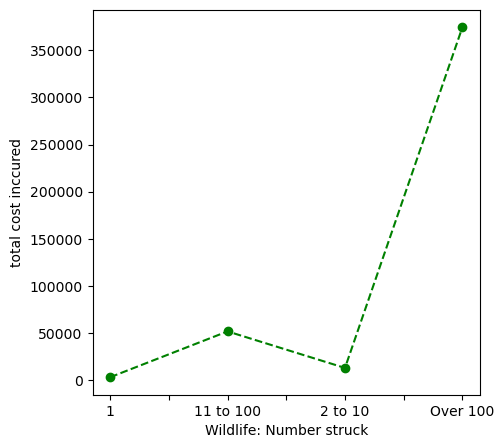

In [89]:
# total Cost Incurred due to Bird Strikes:

plt.figure(figsize=(5,5))
data['Cost: Total $'].groupby(data['Wildlife: Number struck']).agg('mean').plot(marker='o', linestyle= 'dashed', color='green')
plt.ylabel("total cost inccured")
plt.show()

#cost incurred for planes having struck more than 100 bird have more cost incurred, 
#as the damage caused by the fequent strikes would be more.

In [90]:
#yearly cost how much.
pd.crosstab( data['Wildlife: Number struck'], data['Year'])

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
Wildlife: Number struck,,,,,,,,,,,,
1,1124,967,1347,1241,1377,1509,1776,1907,1891,2696,2540,2415
11 to 100,23,25,25,27,23,30,30,15,27,26,31,30
2 to 10,219,236,308,297,292,314,352,379,340,525,550,507
Over 100,1,2,1,3,0,0,1,0,0,0,0,0


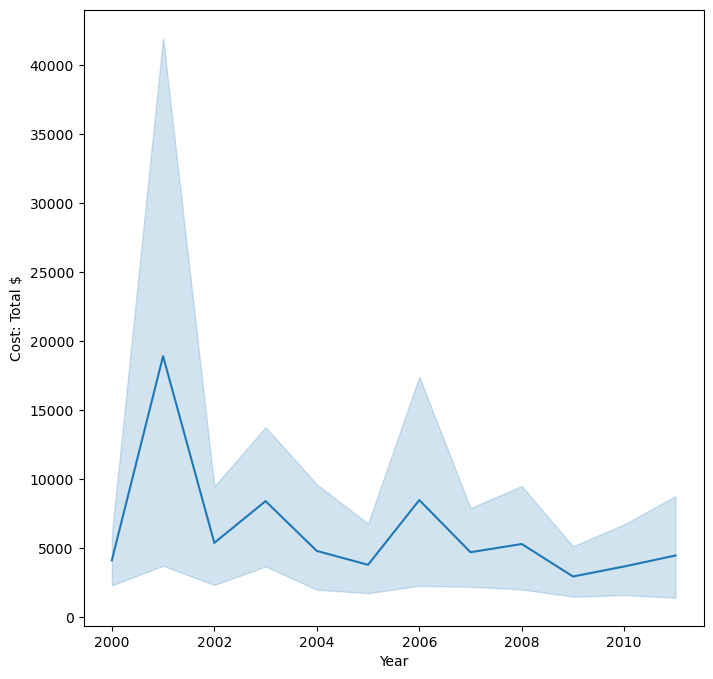

In [91]:
#cost incurred over th years--it has decreased as the over 100 strike rate has competely decreased, so less damage,
#so less cost incrred by the airplane operators. 

plt.figure(figsize=(8,8))
sns.lineplot(y= data['Cost: Total $'],x= data['Year'])
plt.show()

In [92]:
# When do most bird strikes occur?--Phase of flight at the time of the strike.

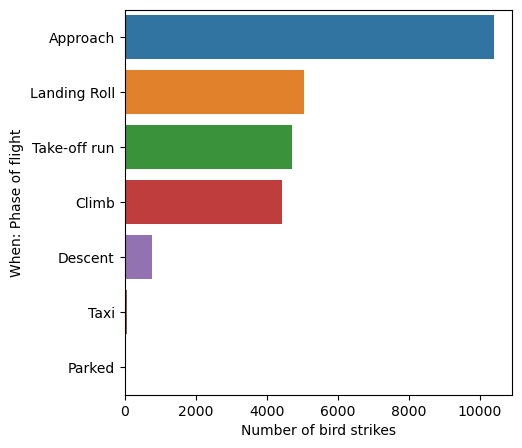

In [93]:
#  When do most bird strikes occur?--Phase of flight at the time of the strike.
# during approach time, highest bird strike rate is there
# top 3 phases:- approach, landing roll, and take-off run. 

plt.figure(figsize=(5,5))
sns.countplot(y=data['When: Phase of flight'], order= data['When: Phase of flight'].value_counts(ascending=False).index)
plt.xlabel("Number of bird strikes")
plt.show()

<AxesSubplot:xlabel='When: Phase of flight'>

<Figure size 500x500 with 0 Axes>

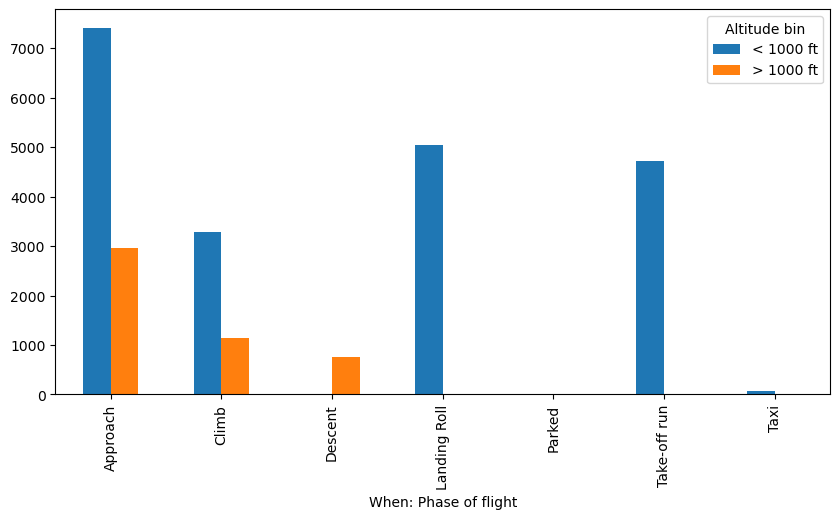

In [141]:
#altitude and phases of flight
plt.figure(figsize=(5,5))
pd.crosstab(data['When: Phase of flight'], data['Altitude bin']).plot(kind='bar')

#so, as we can see in approach, landing roll and take run off the flights phases are less than 1000 ft, 
#so more chances of strike and they are in speed at that time, so damage occurs. 

In [95]:
data.columns

Index(['Record ID', 'Airport: Name', 'Altitude bin', 'Aircraft: Make/Model',
       'Wildlife: Number struck', 'Wildlife: Number Struck Actual',
       'Effect: Impact to flight', 'FlightDate', 'Effect: Indicated Damage',
       'Aircraft: Number of engines?', 'Aircraft: Airline/Operator',
       'Origin State', 'When: Phase of flight', 'Conditions: Precipitation',
       'Remains of wildlife collected?',
       'Remains of wildlife sent to Smithsonian', 'Wildlife: Size',
       'Conditions: Sky', 'Wildlife: Species',
       'Pilot warned of birds or wildlife?', 'Cost: Total $',
       'Feet above ground', 'Number of people injured', 'Is Aircraft Large?',
       'Year'],
      dtype='object')

In [96]:
# Effect of Strike at Different Altitude----indicated damage and altitude

pd.crosstab(data['Altitude bin'], data['Effect: Indicated Damage'])

Effect: Indicated Damage,Caused damage,No damage
Altitude bin,,
< 1000 ft,1702,18854
> 1000 ft,752,4121


In [97]:
(data[data['Effect: Indicated Damage']=='Caused damage']).groupby(data['Altitude bin']).agg('count')[['Wildlife: Number struck']]

,Wildlife: Number struck
Altitude bin,
< 1000 ft,1702
> 1000 ft,752


In [98]:
df= pd.DataFrame({'< 1000 ft': [1702], '> 1000 ft':[752]})
new_df= pd.DataFrame(df, columns=df.columns).apply(lambda x: int(x))
print(new_df)

< 1000 ft    1702
> 1000 ft     752
dtype: int64


In [99]:
y=(data['Record ID'].groupby(data['Effect: Indicated Damage']).agg('count')).apply(lambda x: int(x)).iloc[:1]
print(y)

Effect: Indicated Damage
Caused damage    2454
Name: Record ID, dtype: int64


In [100]:
z=list(map(lambda a,b:(a/b)*100, new_df, y))
print(z)

#about 70% of the flights whch are damaged, were flying in the <1000 ft altitude. 
#as a lot of wildlife are flying in that range. 

[69.3561532192339]


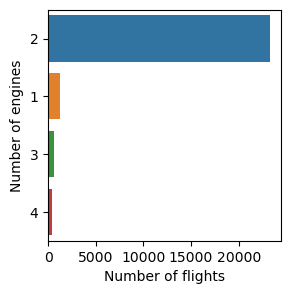

In [101]:
# impact to flight and number of engines
plt.figure(figsize=(3,3))
sns.countplot(y=data['Aircraft: Number of engines?'], order= data['Aircraft: Number of engines?'].value_counts().iloc[:4].index)
plt.xlabel("Number of flights")
plt.ylabel("Number of engines")
plt.show()

In [102]:
# impact to flight and number of engines---is more the number of engines less is the impact on flight
# Not related-impact of flight and number of engines as most of the cases there is no effect in all engine types. 
pd.crosstab(data['Effect: Impact to flight'], data['Aircraft: Number of engines?'])

Aircraft: Number of engines?,1,2,3,4,C
Effect: Impact to flight,,,,,
Aborted Take-off,84,374,7,14,0
Engine Shut Down,7,70,2,9,0
None,821,21665,532,332,1
Other,53,317,9,11,0
Precautionary Landing,275,810,14,22,0


In [103]:
#impact to damage and number of engines---is more engines means less is the damage
# both are not related---as engines with 2,3,4 have similar amount of damaged flights.
(data[data['Effect: Indicated Damage']=='Caused damage'].groupby(data['Aircraft: Number of engines?']).agg('count'))['Effect: Indicated Damage'].iloc[:4]

Aircraft: Number of engines?
1     313
2    2040
3      57
4      44
Name: Effect: Indicated Damage, dtype: int64

In [104]:
df= pd.DataFrame({'1': [313], '2':[2040], '3':[57], '4':[44]})
new_df= pd.DataFrame(df, columns=df.columns).apply(lambda x: int(x))
print(new_df)

1     313
2    2040
3      57
4      44
dtype: int64


In [105]:
y=(data['Record ID'].groupby(data['Aircraft: Number of engines?']).agg('count')).apply(lambda x: int(x)).iloc[:4]
print(y)

Aircraft: Number of engines?
1     1240
2    23236
3      564
4      388
Name: Record ID, dtype: int64


In [106]:
z=list(map(lambda a,b:(a/b)*100, new_df, y))
print(z)


[25.241935483870968, 8.779480117059734, 10.106382978723403, 11.34020618556701]


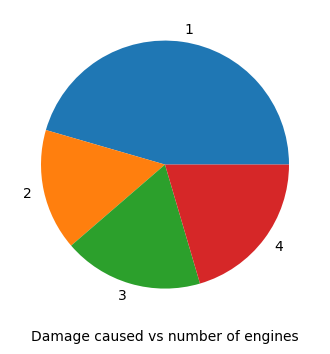

In [107]:
plt.figure(figsize=(4, 5))

z= [25.241935483870968, 8.779480117059734, 10.106382978723403, 11.34020618556701]
plt.pie(z, labels=['1','2','3','4'])
plt.xlabel('Damage caused vs number of engines')
plt.show()

# airplanes with 1 engine are easily damaged with 25% of flights damaged,followed by 4 engines, 3 and then 2 engines, which 
#implies tht may be damage is not related to the number of engines as airplanes having >1 engine has similar damage. 

In [108]:
data.columns

Index(['Record ID', 'Airport: Name', 'Altitude bin', 'Aircraft: Make/Model',
       'Wildlife: Number struck', 'Wildlife: Number Struck Actual',
       'Effect: Impact to flight', 'FlightDate', 'Effect: Indicated Damage',
       'Aircraft: Number of engines?', 'Aircraft: Airline/Operator',
       'Origin State', 'When: Phase of flight', 'Conditions: Precipitation',
       'Remains of wildlife collected?',
       'Remains of wildlife sent to Smithsonian', 'Wildlife: Size',
       'Conditions: Sky', 'Wildlife: Species',
       'Pilot warned of birds or wildlife?', 'Cost: Total $',
       'Feet above ground', 'Number of people injured', 'Is Aircraft Large?',
       'Year'],
      dtype='object')

AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)


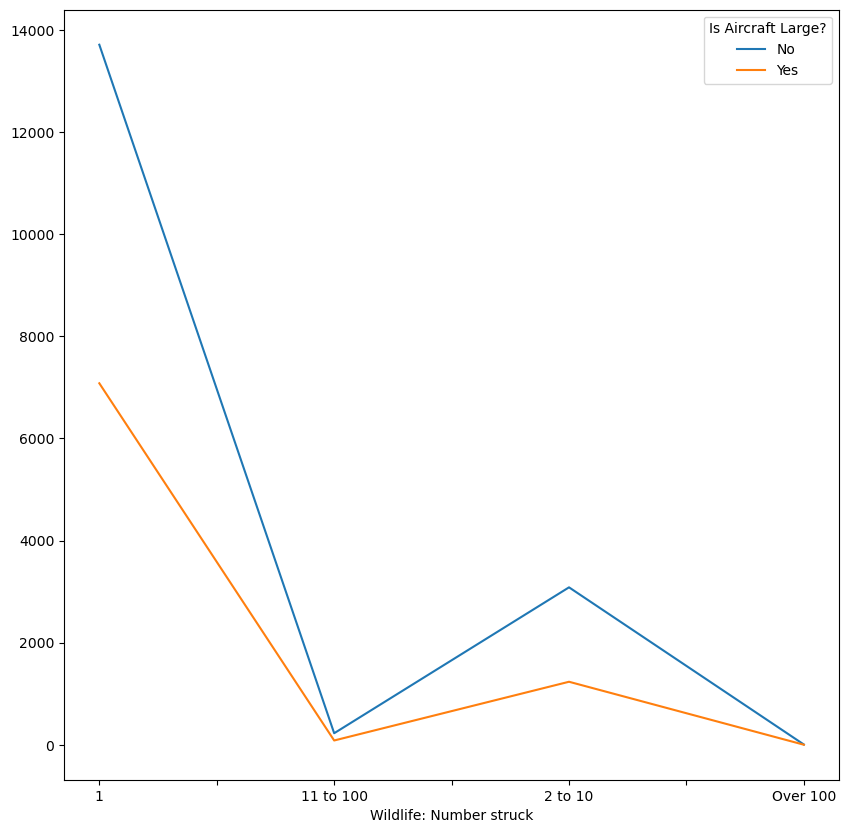

<Figure size 400x400 with 0 Axes>

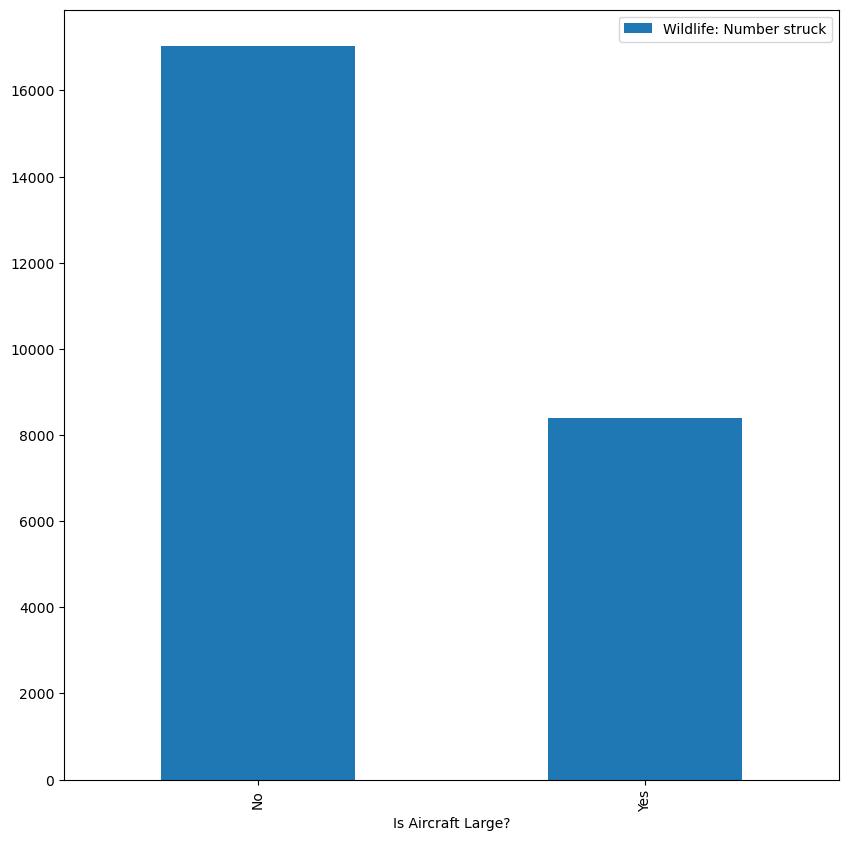

In [109]:
# size of the airplane and the bird strike.
#small flights are striking the birds more as compared to the larger planes. 

print(pd.crosstab(data['Wildlife: Number struck'], data['Is Aircraft Large?']).plot())

# print(data[data['Is Aircraft Large?']=='Yes'].groupby(data['Wildlife: Number struck']).agg('count')['Effect: Indicated Damage'])
plt.figure(figsize=(4,4))
print(data.pivot_table(values='Wildlife: Number struck', index= 'Is Aircraft Large?', aggfunc='count').plot(kind='bar'))
plt.show()

In [110]:
#airplane size and alitude bin
pd.crosstab(data['Altitude bin'], data['Is Aircraft Large?']).

#as the number of the smaller planes in the highest in the <1000ft, so maximum bird strike rate are higher by smaller planes.. 

Is Aircraft Large?,No,Yes
Altitude bin,,
< 1000 ft,14416,6140
> 1000 ft,2611,2262


In [111]:
#altitude and the birds strike
pd.crosstab(data['Altitude bin'],data['Wildlife: Number struck'])

# in <1000ft more birds are flying, as compared to >1000ft. 

Wildlife: Number struck,1,11 to 100,2 to 10,Over 100
Altitude bin,,,,
< 1000 ft,16402,300,3847,7
> 1000 ft,4388,12,472,1


Text(0, 0.5, 'Number of birds')

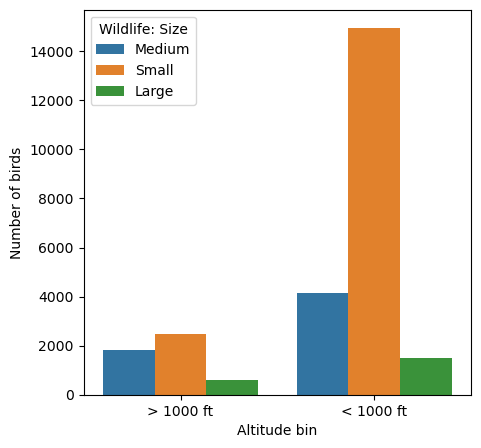

In [112]:
# wildlife size and feet above the ground.
plt.figure(figsize=(5,5))
sns.countplot(data['Altitude bin'], hue= data['Wildlife: Size'])
plt.ylabel("Number of birds")

In [113]:
data[data['Altitude bin']== '< 1000 ft'].groupby(data['Wildlife: Size']).agg('count')['Wildlife: Number struck']

Wildlife: Size
Large      1482
Medium     4127
Small     14947
Name: Wildlife: Number struck, dtype: int64

In [114]:
total_birds_flying_below_1000= data[data['Altitude bin']== '< 1000 ft'].shape[0]
print(total_birds_flying_below_1000)

20556


In [115]:
df= pd.DataFrame({'Large': [1482], 'Medium':[4127], 'Small':[14947]})
new_df= pd.DataFrame(df, columns=df.columns).apply(lambda x: int(x))
print(new_df)

Large      1482
Medium     4127
Small     14947
dtype: int64


In [116]:
z=list(map(lambda x: (x/total_birds_flying_below_1000)*100, new_df))
print(z)

[7.209573847051956, 20.076863202957774, 72.71356294999028]


In [117]:
print(data[data['Altitude bin']== '> 1000 ft'].groupby(data['Wildlife: Size']).agg('count')['Wildlife: Number struck'])
total_birds_flying_above_1000= data[data['Altitude bin']== '> 1000 ft'].shape[0]
print(total_birds_flying_above_1000)

Wildlife: Size
Large      598
Medium    1810
Small     2465
Name: Wildlife: Number struck, dtype: int64
4873


In [118]:
df= pd.DataFrame({'Large': [598], 'Medium':[1810], 'Small':[2465]})
new_df= pd.DataFrame(df, columns=df.columns).apply(lambda x: int(x))
print(new_df)

Large      598
Medium    1810
Small     2465
dtype: int64


In [119]:
w=list(map(lambda x: (x/total_birds_flying_above_1000)*100, new_df))
print(w)

[12.271701210753129, 37.14344346398523, 50.58485532526164]


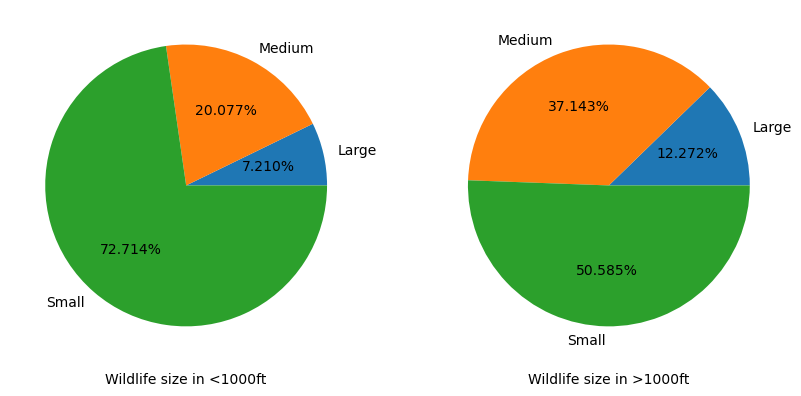

In [120]:
plt.rcParams['figure.figsize']=(10,5)

plt.subplot(1,2,1)
z= [7.209573847051956, 20.076863202957774, 72.71356294999028]
plt.pie(z, labels=['Large', 'Medium', 'Small'], autopct='%2.3f%%')
plt.xlabel('Wildlife size in <1000ft')


plt.subplot(1,2,2)
w= [12.271701210753129, 37.14344346398523, 50.58485532526164]
plt.pie(w, labels=['Large', 'Medium', 'Small'], autopct='%2.3f%%')
plt.xlabel('Wildlife size in >1000ft')

plt.show()

#in both altitudes, small birds are fying the maximum.  

In [121]:
data[data['Wildlife: Size']== 'Large'].groupby(data['Altitude bin']).agg('count')['Wildlife: Number struck']

Altitude bin
< 1000 ft    1482
> 1000 ft     598
Name: Wildlife: Number struck, dtype: int64

In [122]:
data[data['Wildlife: Size']== 'Medium'].groupby(data['Altitude bin']).agg('count')['Wildlife: Number struck']

Altitude bin
< 1000 ft    4127
> 1000 ft    1810
Name: Wildlife: Number struck, dtype: int64

In [123]:
# in both cases we can see that maximum large and medium size birds are flying in the <1000 ft altitude bin. 

In [124]:
# effect on airplane and wildlife size
#large and medium size wildlifes are creating more damage as compared to small size wildlife. 

In [125]:
data[data['Effect: Indicated Damage']== 'Caused damage'].groupby(data['Wildlife: Size']).agg('count')['Wildlife: Number struck']
# large wildlife are creating damages the maximum.  

Wildlife: Size
Large     928
Medium    924
Small     602
Name: Wildlife: Number struck, dtype: int64

In [126]:
df= pd.DataFrame({'Large': [928], 'Medium':[924], 'Small':[602]})
new_df= pd.DataFrame(df, columns=df.columns).apply(lambda x: int(x))
print(new_df)

Large     928
Medium    924
Small     602
dtype: int64


In [127]:
TotalCasesOfDamageCaused=data[data['Effect: Indicated Damage']=='Caused damage'].shape[0]

In [128]:
w=list(map(lambda x: (x/TotalCasesOfDamageCaused)*100, new_df))
print(w)


#large and medium size wildlifes are causing the damage maximum..

[37.815810920945395, 37.65281173594132, 24.531377343113284]


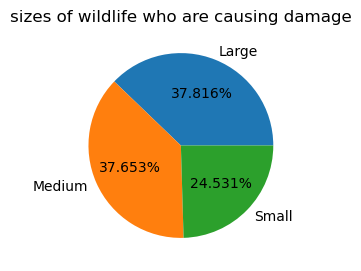

In [129]:
w= [37.815810920945395, 37.65281173594132, 24.531377343113284]
plt.figure(figsize=(3,3))
plt.pie(w, labels=['Large', 'Medium', 'Small'], autopct='%2.3f%%')
plt.title('sizes of wildlife who are causing damage')
plt.show()

In [130]:
#wildlife size and actual number of wildlife strike. 

#result= #small birds are getting hit the most. 75% the flight struck a bird, it was of small size. 
#so, though the number of small birds getting hit are high, but damage caused by them is less. 

<AxesSubplot:ylabel='Wildlife: Number Struck Actual'>

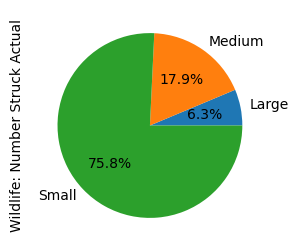

In [131]:
plt.figure(figsize=(3,3))
data['Wildlife: Number Struck Actual'].groupby(data['Wildlife: Size']).agg('sum').plot(kind='pie', autopct='%1.1f%%')

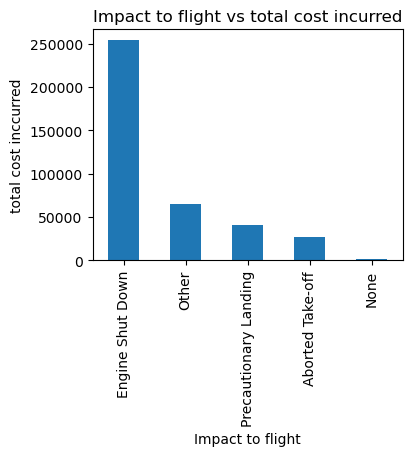

In [132]:
# impact to flight and the cost endured.
# on an average, engine shut down has the max total cost incurred.

plt.figure(figsize=(4,3))
data.groupby('Effect: Impact to flight')['Cost: Total $'].agg('mean').sort_values(ascending=False).plot(kind='bar')
plt.title("Impact to flight vs total cost incurred")
plt.xlabel('Impact to flight')
plt.ylabel("total cost inccurred")
plt.show()

In [133]:
#Conclusion:-

#factors affecting bird strike- 
#altitude,
#cloud conditions,
#phase of fights,
#pilots were not informed. 

# factors not affecting the bird strike rate- 
# wildlife size, 
# Number of engines. 
# aircraft size